In [2]:
import zipfile
import re
import os
import pandas as pd
import numpy as np
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [3]:
files = os.listdir(r"C:\Users\saiki\Downloads\txt_reviews_extracted\txt_reviews")

In [ ]:
ProductId = []
UserId = []
ProfileName = []
HelpfullnessNumerator = []
HelpfulnessDenominator = []
Score = []
Time = []
ReviewSummary = []
ReviewText = []    
for file,num in zip(files,range(0,len(files))):
    with open(fr"C:\Users\saiki\Downloads\txt_reviews_extracted\txt_reviews\{file}",encoding= "utf-8") as txt:
        txt_read = txt.read()

        try:
            Product_id = re.findall(r"ProductId:\s(.*)",txt_read)
            ProductId.append(Product_id[0])
            
            User_id = re.findall(r'UserId:\s(.*)',txt_read)
            UserId.append(User_id[0])
            
            Profile_name = re.findall(r"ProfileName:\s(.*)",txt_read)
            ProfileName.append(Profile_name[0])
            
            Helpfullness_numerator = re.findall(r"HelpfulnessNumerator:\s(.*)",txt_read)
            HelpfullnessNumerator.append(Helpfullness_numerator[0])
            
            Helpfullness_denomerator = re.findall(r"HelpfulnessDenominator:\s(.*)",txt_read)
            HelpfulnessDenominator.append(Helpfullness_denomerator[0])
            
            score = re.findall(r"Score:\s(.*)",txt_read)
            Score.append(score[0])
            
            time = re.findall(r"Time:\s(.*)",txt_read)
            Time.append(time[0])
            
            Review_Summary = re.findall(r'ReviewSummary:\s(.*)',txt_read)
            ReviewSummary.append(Review_Summary[0])
            
            Review_text = re.findall(r"ReviewText:\s(.*)",txt_read)
            ReviewText.append(Review_text[0])
        except:
            print(f'skipping the {file}')

In [101]:
df = pd.DataFrame({"ProductId":ProductId,"UserId":UserId,"ProfileName":ProfileName,"HelpfullnessNumerator":HelpfullnessNumerator,
                 "HelpfulnessDenominator":HelpfulnessDenominator,"Score":Score,"Time":Time,"ReviewSummary":ReviewSummary,
                  "ReviewText":ReviewText})

In [ ]:
df.head()

In [7]:
df.isna().sum()

ProductId                  0
UserId                     0
ProfileName               26
HelpfullnessNumerator      0
HelpfulnessDenominator     0
Score                      0
Time                       0
ReviewSummary             27
ReviewText                 0
dtype: int64

In [104]:
df.to_csv("reviews.csv")

### Target Variable

C:\Users\saiki\AppData\Local\Temp\ipykernel_21396\2721266481.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df['Score'],palette="tab10")


<Axes: xlabel='Score', ylabel='count'>

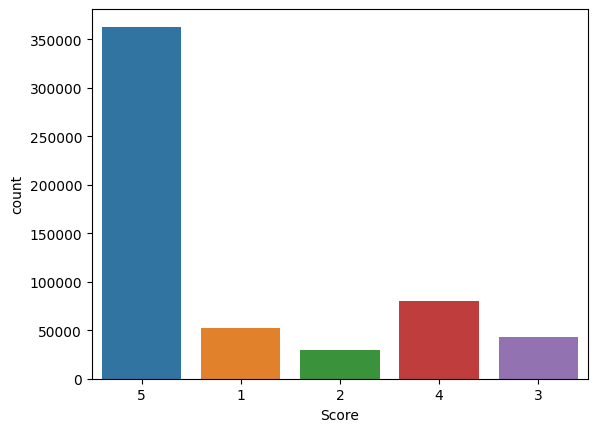

In [108]:
sns.countplot(x = df['Score'],palette="tab10")

### Review Text

In [109]:
def clean(doc):
    
    #remove the special characters and digits
    regex = "[^a-zA-Z0-9]"
    doc = re.sub(regex," ",doc)
     
    # It converts the lower case
    doc = doc.lower()
    
    #Tokanaization
    tokens = nltk.word_tokenize(doc)
    
    #stop words removel
    stop_words = set(stopwords.words("english"))
    filter_words = [word for word in tokens if word not in stop_words]
    
    #lemmataization
    lemmataizer  = WordNetLemmatizer()
    lemmataizer_tokens = [lemmataizer.lemmatize(tokens) for tokens in filter_words]
    
    #join and return
    return " ".join(lemmataizer_tokens)
    

In [128]:
def tokenizer(doc):
    return nltk.word_tokenize(doc)

In [112]:
df['Review_text'] = df['ReviewText'].apply(lambda x:clean(x))

In [113]:
df.head()

,ProductId,UserId,ProfileName,HelpfullnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText,Review_text
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,bought several vitality canned dog food produc...
1,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...,healthy dog food good digestion also good smal...
2,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,1,1331164800,Bad,I fed this to my Golden Retriever and he hated...,fed golden retriever hated eat gave terrible d...
3,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,2,1332374400,"Not hot, not habanero","I have to admit, I was a sucker for the large ...",admit sucker large quantity 12 oz shopping hot...
4,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,4,1337472000,The best weve tried so far,We have a 7 week old... He had gas and constip...,7 week old gas constipation problem first 5 we...


In [116]:
X = df.drop(columns="Score")
X.head()

,ProductId,UserId,ProfileName,HelpfullnessNumerator,HelpfulnessDenominator,Time,ReviewSummary,ReviewText,Review_text
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,bought several vitality canned dog food produc...
1,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...,healthy dog food good digestion also good smal...
2,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,1331164800,Bad,I fed this to my Golden Retriever and he hated...,fed golden retriever hated eat gave terrible d...
3,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,1332374400,"Not hot, not habanero","I have to admit, I was a sucker for the large ...",admit sucker large quantity 12 oz shopping hot...
4,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,1337472000,The best weve tried so far,We have a 7 week old... He had gas and constip...,7 week old gas constipation problem first 5 we...


In [122]:
y = df[['Score']]

In [123]:
y.head()

,Score
0,5
1,5
2,1
3,2
4,4


### Seggregate Input and Outputs

In [124]:
from sklearn.model_selection import train_test_split

In [125]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

In [126]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(397917, 9) (170537, 9)
(397917, 1) (170537, 1)


In [127]:
from sklearn.feature_extraction.text import CountVectorizer

In [129]:
vect = CountVectorizer(token_pattern=None,
                           tokenizer=tokenizer,
                           ngram_range=(1, 1), 
                           lowercase=False, 
                           preprocessor=clean, 
                           stop_words=None)

In [130]:
X_train.head()

,ProductId,UserId,ProfileName,HelpfullnessNumerator,HelpfulnessDenominator,Time,ReviewSummary,ReviewText,Review_text
333546,B002IEVJRY,A3O60C5513YYD6,H. J. Spivack,0,1,1333065600,Review of illy issimo Capucinno Coffee drink,"I'm a very big consumer of caffiene beverages,...",big consumer caffiene beverage drinking multip...
149769,B000KV7ZGQ,A35WAE3S8KAV9E,photogirl,0,0,1281052800,good idea in theory,"Even though I used small puppy kibble, my pupp...",even though used small puppy kibble puppy coul...
483649,B001OCBSZO,A2TL2O3CLY25B3,"Thomas A. Elliott ""MacManSC""",1,1,1292112000,Crystal Light Strawberry Banana Hunger Satisfa...,I have tried just about every brand of powdere...,tried every brand powdered add water drink mix...
392300,B0052BRXHA,A2P0IT2FFLEYLG,Mary,1,1,1318636800,Very yummy!,I purchased this item because I work with thre...,purchased item work three vegan wanting bring ...
1514,B003EML8PM,A7J5U99VRM86Q,prosdokaobasilea,0,0,1317513600,Best thing since sliced bread!!!,If you love Pork Rinds then these are the thin...,love pork rind thing get light right amount he...


In [131]:
X_train_transformed = vect.fit_transform(X_train['ReviewText'])

In [132]:
X_test_transformed = vect.transform(X_test['ReviewText'])

### Linear Regression

In [135]:
from sklearn.linear_model import LinearRegression

In [136]:
linear = LinearRegression()

In [137]:
linear.fit(X_train_transformed,y_train)

LinearRegression()

In [140]:
y_pred = linear.predict(X_test_transformed)

In [138]:
from sklearn import metrics

In [141]:
metrics.mean_absolute_error(y_pred,y_test)

0.7542635887619699